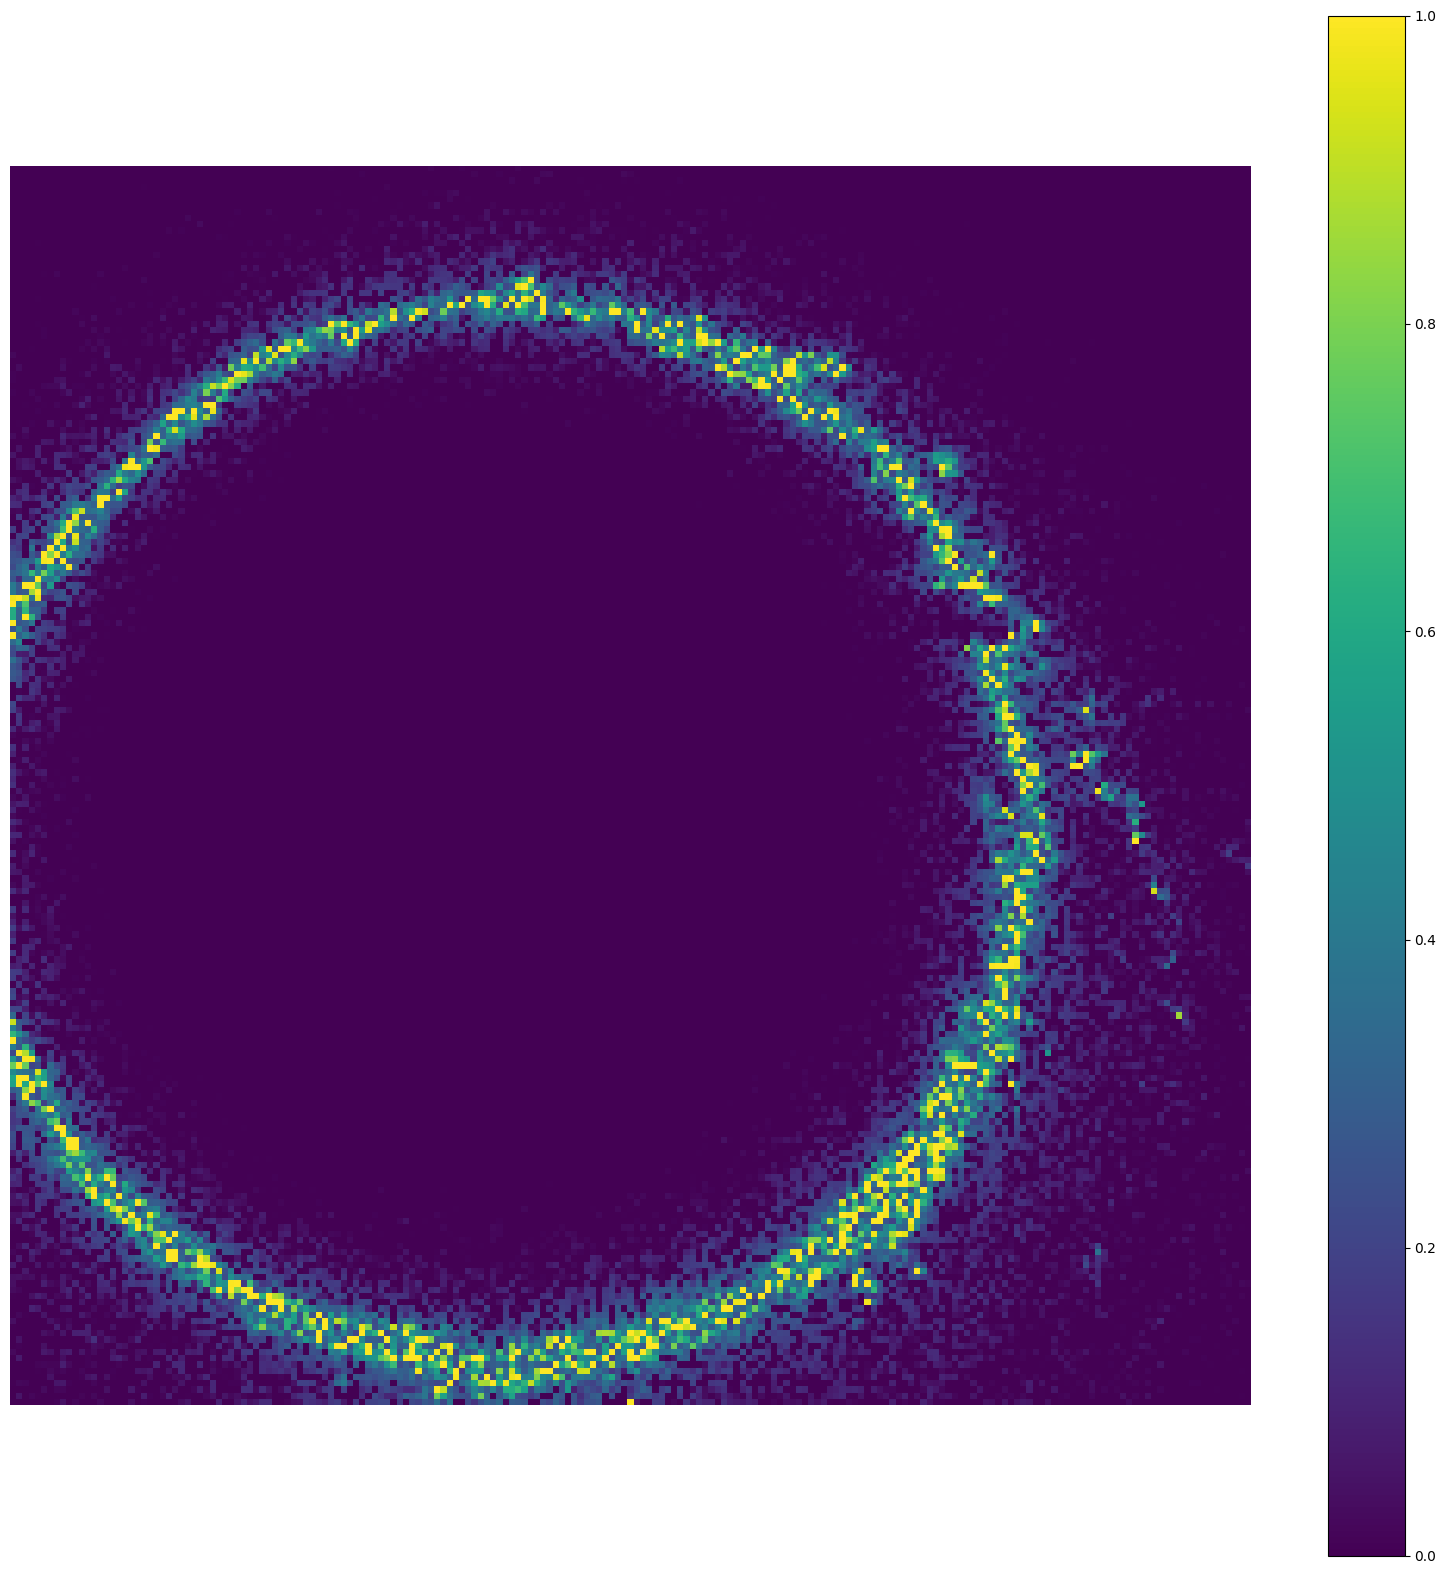

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data2D = 0
plot = 0
dataSd2D = 0


##### x, y: location. Return: mean and standard deviation to represent the data at [x,y]
##### DO NOT modify this function
def getDataValue(x, y):
    return data2D[x, y], dataSd2D[x, y]

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize():
    global data2D
    global data2DPlot
    global plot
    global dataSd2D
    data2D = np.load("rawData.npy").transpose()
    dataSd2D = np.load("rawDataSd.npy").transpose()
    plot = np.zeros((data2D.shape[0]-1, data2D.shape[1]-1))

    plt.rcParams['figure.figsize'] = [20, 20]
    plt.axis('off')

##### (TODO) WORK on this function
##### compute and draw the uncertain isocontour of the given datavalue ("isovalue")
##### you should use "getDataVlue()" to get the data (Gaussian distribution) you want
##### Store the probability field in 'plot' to display
##### I do not mind the computation is efficnet or not
def computePlotIsoContour( isovalue ):
    #########TODO
    delta = 15
    
    for x in range(plot.shape[0]):
        for y in range(plot.shape[1]):
            mean, sd = getDataValue(x, y)
            
            min_prob = norm.cdf(isovalue - delta, loc=mean, scale=sd)
            max_prob = norm.cdf(isovalue + delta, loc=mean, scale=sd)
            plot[x, y] = max_prob - min_prob


    plt.imshow(plot, cmap='viridis', vmin=0, vmax=1)
    plt.colorbar()

##### main 
Initialize()

##### You can modify this function call to test your program on different isovalues
computePlotIsoContour(0)

plt.show()